In [1]:
import tensorflow as tf    ##--image classification
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='D:/CATS_DOGS/train',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='D:/CATS_DOGS/test',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [3]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
32/32 [==============================] - 152s 5s/step - loss: 6.5486 - accuracy: 0.5500 - val_loss: 9.8400 - val_accuracy: 0.5000
Epoch 2/10
16/32 [==============>...............] - ETA: 56s - loss: 4.1866 - accuracy: 0.6797 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2


In [ ]:
test_img = cv2.imread('D:/dog1.jpg')

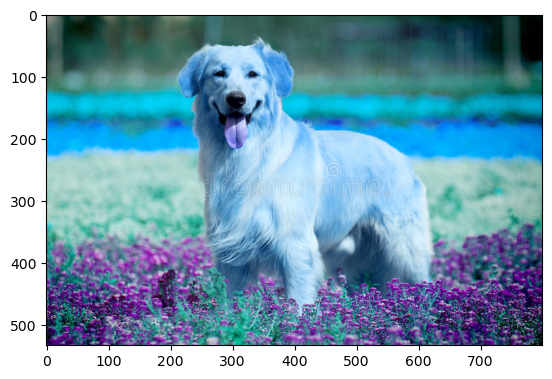

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(533, 800, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 39ms/step


array([[1.]], dtype=float32)